In [1]:
! pip install tensorflow_gpu==2.0.0-rc1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb

# 텐서플로 버전 확인 필수!
tf.__version__

'2.0.0-rc1'

# 02.순환 신경망 제작

훈련 데이터 준비
(영화 리뷰 데이터)

In [5]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top = 20, num_words = 100)
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [6]:
# 훈련 세트의 샘플 확인 (영단어 = 고유 정수)
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [7]:
# 훈련세트에서 2 제외하기 (2 = 사전에 없는 단어)
for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [8]:
# 어휘 사전 내려받기
word_to_index = imdb.get_word_index()
# 'movie'에 대응하는 숫자
word_to_index['movie']

17

In [9]:
# 훈련 세트 정수를 영단어로 변환
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w - 3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [10]:
# 훈련 세트의 타깃 데이터 확인  (참, 거짓 값 확인)  (1 = 참, 0 거짓)
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [0]:
# 검증 세트 준비
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

샘플 길이 맞추기

In [0]:
# 텐서플로를 사용하여 샘플 길이 맞추기
from tensorflow.keras.preprocessing import sequence

maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen = maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen = maxlen)

In [13]:
# 크기 확인
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [14]:
# 샘플 확인
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


샘플 원-핫 인코딩

In [15]:
# 텐서플로 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

# 샘플 크기, 데이터
print(x_train_onehot.shape, x_train_onehot.nbytes, sep = '\n')

(20000, 100, 100)
800000000


순환 신경망 클래스 구현

In [0]:
class RecurrentNetwork:

  def __init__(self, n_cells = 10, batch_size = 32, learning_rate = 0.1):
    self.n_cells = n_cells         # 셀 개수
    self.batch_size = batch_size  # 배치 크기
    self.w1h = None               # 은닉 상태에 대한 가중치
    self.w1x = None               # 입력에 대한 가중치
    self.b1 = None                # 순환층의 절편
    self.w2 = None                # 출력층의 가중치
    self.b2 = None                # 출력층의 절편
    self.h = None                 # 순환층의 활성화 출력
    self.losses = []              # 훈련 손실
    self.val_losses = []          # 검증 손실
    self.lr = learning_rate       # 학습률

  def forpass(self, x):
    self.h = [np.zeros((x.shape[0], self.n_cells))]  # 은닉 상태를 초기화
    # 배치 차원과 타임 스텝 차원 변형
    seq = np.swapaxes(x, 0, 1)
    # 순환층의 선형식 계산
    for x in seq:
      z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
      h = np.tanh(z1)                     # 활성화 함수 적용
      self.h.append(h)                    # 역전파를 위한 은닉 상태 저장
      z2 = np.dot(h, self.w2) + self.b2   # 출력층의 선형식 계산
    return z2

  def backprop(self, x, err):
    m = len(x)        # 샘플 개수

    # 출력층의 가중치와 절편에 대한 그레이디언트 계산
    w2_grad = np.dot(self.h[-1].T, err) / m
    b2_grad = np.sum(err) / m
    # 배치 차원과 타입 스텝 차원 변형
    seq = np.swapaxes(x, 0, 1)

    w1h_grad = w1x_grad = b1_grad = 0
    # 셀 직전까지 그레이디언트 계산
    err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
    # 모든 타임 스텝을 거슬러 가면서 그레이디언트 전파
    for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
      w1h_grad += np.dot(h.T, err_to_cell)
      w1x_grad += np.dot(x.T, err_to_cell)
      b1_grad += np.sum(err_to_cell, axis = 0)
      # 이전 타임 스텝의 셀 직전까지 그레이디언트 계산
      err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)

    w1h_grad /= m
    w1x_grad /= m
    b1_grad /= m

    return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad

  def sigmoid(self, z):
    a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
    return a

  def init_weights(self, n_features, n_classes):
    orth_init = tf.initializers.Orthogonal()
    glorot_init = tf.initializers.GlorotUniform()

    self.w1h = orth_init((self.n_cells, self.n_cells)).numpy()          # (셀 개수, 셀 개수)
    self.w1x = glorot_init((n_features, self.n_cells)).numpy()          # (특성 개수, 셀 개수)
    self.b1 = np.zeros(self.n_cells)                                    # 은닉층의 크기
    self.w2 = glorot_init((self.n_cells, n_classes)).numpy()            # (셀 개수, 클래스 개수)
    self.b2 = np.zeros(n_classes)

  def fit(self, x, y, epochs = 100, x_val = None, y_val = None):
    y = y.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    np.random.seed(42)
    self.init_weights(x.shape[2], y.shape[1])           # 은닉층과 출력층 가중치 초기화
    # epochs만큼 반복
    for i in range(epochs):
      print('에포크', i, end = ' ')
      # 제너레이터 함수에서 반환한 미니 배치를 순환
      batch_losses = []
      for x_batch, y_batch in self.gen_batch(x, y):
        print('.', end = '')
        a = self.training(x_batch, y_batch)             ## 07장 training 메서드에서 x_val, y_val을 제거

        # 안전한 로그 계산을 위한 클리핑
        a = np.clip(a, 1e-10, 1-1e-10)
        # 로그 손실과 규제 손실을 더하여 리스트에 추가
        loss = np.mean(-(y_batch * np.log(a) + (1-y_batch) * np.log(1-a)))
        batch_losses.append(loss)
      print()
      self.losses.append(np.mean(batch_losses))
      # 검증 세트에 대한 손실을 계산
      self.update_val_loss(x_val, y_val)

  # 미니 배치 제너레이터 함수
  def gen_batch(self, x, y):
    length = len(x)
    bins = length // self.batch_size  # 미니 배치 횟수
    if length % self.batch_size:
      bins += 1                       # 나누어 떨어지지 않을 때
    indexes = np.random.permutation(np.arange(len(x)))      # 인덱스 셔플
    x = x[indexes]
    y = y[indexes]
    for i in range(bins):
      start = self.batch_size * i
      end = self.batch_size * (i + 1)
      yield x[start:end], y[start:end]    # batch_size만큼 슬라이싱하여 반환

  def training(self, x, y): ## 07장 training 메서등에서 x_val, y_val을 제거
    m = len(x)              # 샘플 개수 저장
    z = self.forpass(x)     # 정방향 계산 수행
    a = self.sigmoid(z)     # 활성화 함수 적용
    err = -(y - a)          # 오차 계산
    # 오차를 역전파 하여 그레이디언트를 계산
    w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
    # 셀의 가중치와 절편을 업데이트
    self.w1h -= self.lr * w1h_grad
    self.w1x -= self.lr * w1x_grad
    self.b1 -= self.lr * b1_grad
    # 출력층의 가중치와 절편을 업데이트
    self.w2 -= self.lr * w2_grad
    self.b2 -= self.lr * b2_grad
    return a

  def predict(self, x):
    z = self.forpass(x)         # 정방향 계산 수행
    return z > 0                # 스텝 함수 적용

  def score(self, x, y):
    # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환
    return np.mean(self.predict(x) == y.reshape(-1, 1))

  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)               # 정방향 계산 수행
    a = self.sigmoid(z)                   # 활성화 함수 적용
    a = np.clip(a, 1e-10, 1-1e-10)        # 출력값 클리핑
    val_loss = np.mean(-(y_val * np.log(a) + (1-y_val) * np.log(1-a)))
    self.val_losses.append(val_loss)

모델 훈련

In [23]:
rn = RecurrentNetwork(n_cells = 32, batch_size = 32, learning_rate = 0.01)
rn.fit(x_train_onehot, y_train, epochs = 20, x_val = x_val_onehot, y_val = y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

손실 및 정확도

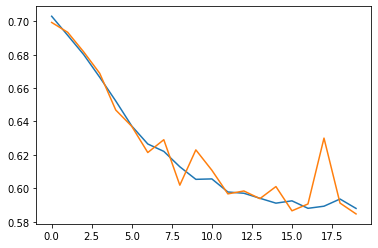

In [24]:
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [25]:
rn.score(x_val_onehot, y_val)

0.689

# 03.텐서플로로 순환 신경망 제작

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [27]:
# 모델 제작
model = Sequential()

model.add(SimpleRNN(32, input_shape = (100, 100)))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 모델 컴파일, 훈련
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs = 20, batch_size = 32, validation_data = (x_val_onehot, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
20000/20000 [==============================] - 18s 911us/sample - loss: 0.6992 - accuracy: 0.5211 - val_loss: 0.6881 - val_accuracy: 0.5512
Epoch 2/20
20000/20000 [==============================] - 17s 830us/sample - loss: 0.6766 - accuracy: 0.5767 - val_loss: 0.6668 - val_accuracy: 0.5938
Epoch 3/20
20000/20000 [==============================] - 17s 831us/sample - loss: 0.6540 - accuracy: 0.6216 - val_loss: 0.6280 - val_accuracy: 0.6522
Epoch 4/20
20000/20000 [==============================] - 17s 829us/sample - loss: 0.6299 - accuracy: 0.6515 - val_loss: 0.6130 - val_accuracy: 0.6702
Epoch 5/20
20000/20000 [==============================] - 17s 834us/sample - loss: 0.6154 - accuracy: 0.6670 - val_loss: 0.6322 - val_accuracy: 0.6556
Epoch 6/20
20000/20000 [==============================] - 17s 845us/sample - loss: 0.6041 - accuracy: 

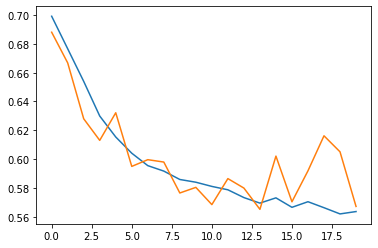

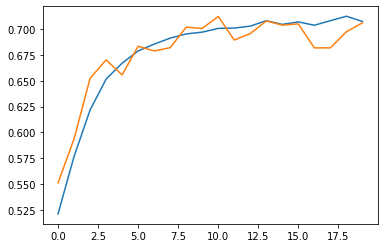

In [30]:
# 손실, 정확도 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [31]:
# 정확도
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose = 0)
print(accuracy)

0.706


임베딩층으로 순환 신경망 모델 성능 높이기

In [0]:
from tensorflow.keras.layers import Embedding

In [0]:
# 훈련 데이터 준비
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top = 20, num_words = 1000)

for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [0]:
# 샘플 길이 맞추기
maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen = maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen = maxlen)

In [35]:
# 모델 제작
model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation = 'sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 모델 컴파일, 훈련
model_ebd.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs = 10, batch_size = 32, validation_data = (x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 807us/sample - loss: 0.4934 - accuracy: 0.7714 - val_loss: 0.4392 - val_accuracy: 0.8028
Epoch 2/10
20000/20000 [==============================] - 15s 742us/sample - loss: 0.3934 - accuracy: 0.8322 - val_loss: 0.4413 - val_accuracy: 0.7976
Epoch 3/10
20000/20000 [==============================] - 15s 738us/sample - loss: 0.3574 - accuracy: 0.8511 - val_loss: 0.4122 - val_accuracy: 0.8168
Epoch 4/10
20000/20000 [==============================] - 15s 734us/sample - loss: 0.3309 - accuracy: 0.8624 - val_loss: 0.4234 - val_accuracy: 0.8200
Epoch 5/10
20000/20000 [==============================] - 15s 734us/sample - loss: 0.3058 - accuracy: 0.8760 - val_loss: 0.4323 - val_accuracy: 0.8146
Epoch 6/10
20000/20000 [==============================] - 15s 732us/sample - loss: 0.2828 - accuracy: 0.8880 - val_loss: 0.4417 - val_accuracy: 0.8222
Epoch 7/10
20000/20000 [=====================

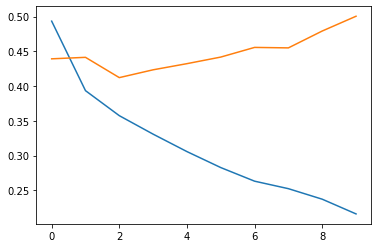

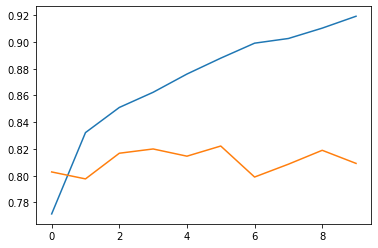

In [37]:
# 손실, 정확도 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [40]:
# 정확도
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose = 0)
print(accuracy)

0.8092


# 04.LSTM 순환 신경망 제작 및 텍스트 분류

In [0]:
from tensorflow.keras.layers import LSTM

In [45]:
# 모델 제작
model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation = 'sigmoid'))

model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 1312      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 모델 컴파일, 훈련
model_lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs = 10, batch_size = 32, validation_data = (x_val_seq, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 26s 1ms/sample - loss: 0.4422 - accuracy: 0.7941 - val_loss: 0.3737 - val_accuracy: 0.8332
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.3354 - accuracy: 0.8580 - val_loss: 0.3550 - val_accuracy: 0.8464
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.3083 - accuracy: 0.8720 - val_loss: 0.3538 - val_accuracy: 0.8436
Epoch 4/10
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.2934 - accuracy: 0.8776 - val_loss: 0.3605 - val_accuracy: 0.8410
Epoch 5/10
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.2765 - accuracy: 0.8845 - val_loss: 0.3872 - val_accuracy: 0.8424
Epoch 6/10
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.2658 - accuracy: 0.8888 - val_loss: 0.4052 - val_accuracy: 0.8350
Epoch 7/10
20000/20000 [==============================] -

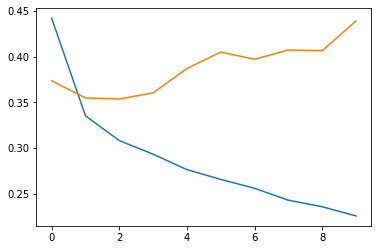

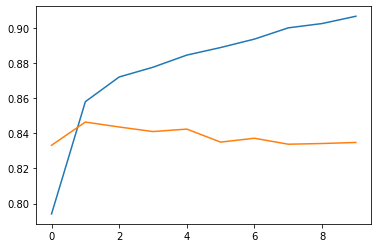

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [51]:
# 정확도
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose = 0)
print(accuracy)

0.8348
